# Multipoles

The field of a single point charge is relatively simple — as far as three-dimensional vector fields go.  What happens as we put more charges together?

Let's use Python to find out.

In [1]:
# Import useful functions
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Turn on interactive plots.
# %matplotlib notebook

# Turn off interactive plots.
%matplotlib inline

We can use the functions in the `visualizing-fields` notebook.

In [3]:
# Define functions to calculate and plot fields.
def coordinates(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    
    return X, Y, Z

def potential(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0, z0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + (Z-z0)**2 + epsilon**2)
    V = q/R
    
    return V

def field(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0, z0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + (Z-z0)**2 + epsilon**2)
    Ex = q*(X-x0)/R**3
    Ey = q*(Y-y0)/R**3
    Ez = q*(Z-z0)/R**3
    
    return Ex, Ey, Ez

def draw_field(x,y,z,u,v,w, stride=25):
    """
    Takes coordinate arrays x,y,z and vector field component
    arrays u,v,w and draws a quiver plot where all of the arrows
    have the same length.
    """
    # Create a quiver plot.
    # Use a coarser grid.
    x = X[::stride,::stride,::stride].copy()
    y = Y[::stride,::stride,::stride].copy()
    z = Z[::stride,::stride,::stride].copy()
    ex = Ex[::stride,::stride,::stride].copy()
    ey = Ey[::stride,::stride,::stride].copy()
    ez = Ez[::stride,::stride,::stride].copy()
    
    fig = plt.figure(dpi=200)
    ax = fig.add_subplot(projection='3d')
    ax.quiver3D(x,y,z,ex,ey,ez, pivot='middle', length=0.7, normalize=True, linewidth=0.5, color='red')
    ax.set_title(r"$\vec{E}(\vec{R})$")

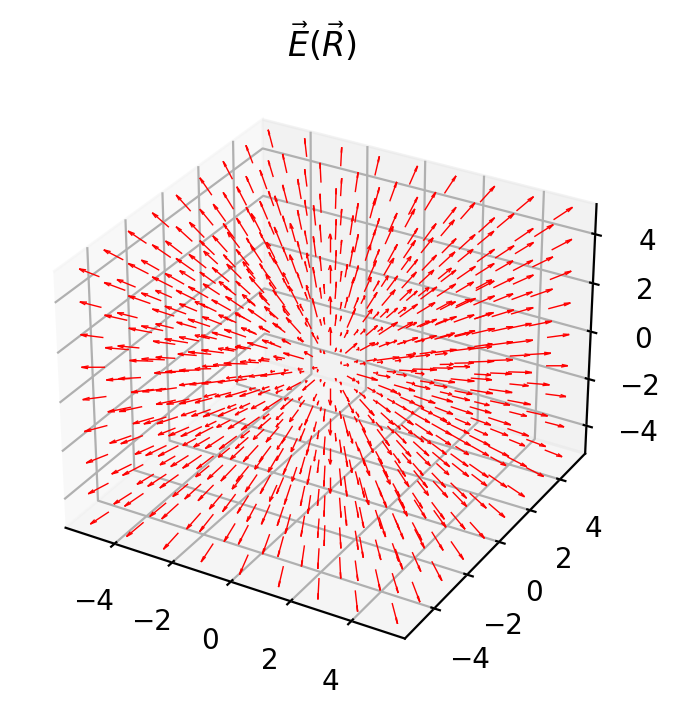

In [4]:
# Draw the field of a point charge at the origin for reference.
X,Y,Z = coordinates()
Ex, Ey, Ez = field()
draw_field(X,Y,Z, Ex,Ey,Ez)

The functions don't require any arguments, but you can supply them to change the behavior.  Let's look at the field of two point charges separated by "2 units".  (We'll talk about units later ...)

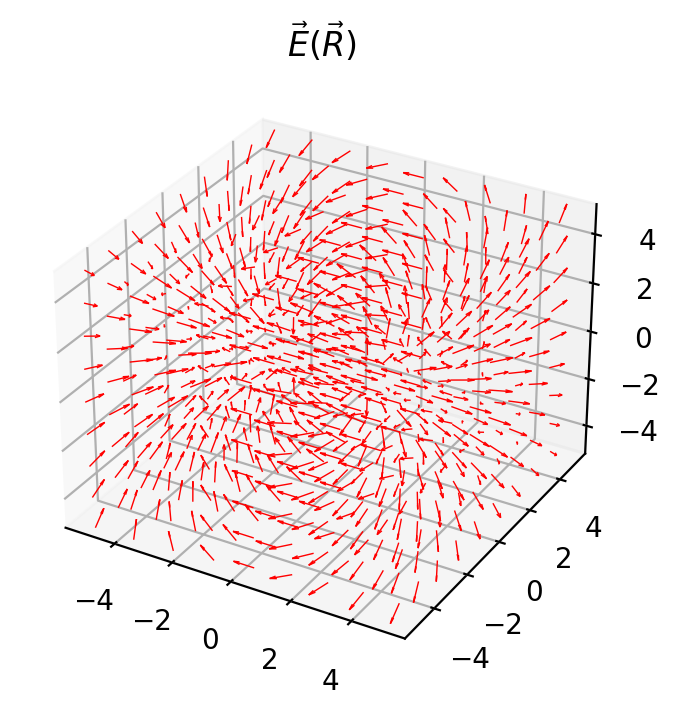

In [5]:
# Charge 1
q1 = +1
x1 = +1
y1 = 0
z1 = 0

# Charge 2
q2 = -1
x2 = -1
y2 = 0
z2 = 0

# Combute combined potential.
V1 = potential(q1, (x1,y1,z1))
V2 = potential(q2, (x2,y2,z2))

# Compute combined field.
E1 = np.stack(field(q1, (x1,y1,z1)))
E2 = np.stack(field(q2, (x2,y2,z2)))

Ex, Ey, Ez = E1 + E2

draw_field(X,Y,Z, Ex, Ey,Ez)

Describe the pattern.  How is it similar to what you observed with a single point charge?  Are there any significant difference?

Like with the single charge, the overall (x,y,z inf to +-2) directions for the vector field is about the same (outwards), but now the origin of the vectors looks capsule-shaped. Locally (x,y,z -2 to +2), however, the field is very different and is no longer symmetric on all  axes.

Change the value of `q2` above to `-1` and replot.  What changes?  How is it similar to what you observed with a single point charge?  Are there any significant difference? 

Now, all of the field lines (indicated by the potential vectors) completly start and end in the two charges; a radical departure from the previous case. The only similarity that comes to mind immediately is that the field lines still converge at the point charges - although in differnt directions this time.

# Dipoles and Quadrupoles

A point charge creates a "monopole" field pattern.  The pattern you just observed is called a "dipole" field.  There are "quadrupoles" and "octupoles" and "hexadecapoles" ... and more.  The patterns can be difficult to interpret in three dimensions, so we will focus our attention on a 2D slice through the plane where the charges are located.

Let's look at the dipole again.

In [6]:
# Turn off interactive plotting for now.
%matplotlib inline

In [7]:
# Define functions to calculate and plot fields.
def coordinates_2d(charge=1, location=(0,0), box_size=5, grid_points=201, epsilon=1e-6):
    s = np.linspace(-box_size, box_size, grid_points)
    X,Y = np.meshgrid(s,s, indexing='ij')
    
    return X, Y

def potential_2d(charge=1, location=(0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y = np.meshgrid(s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + epsilon**2)
    V = q/R
    
    return V

def field_2d(charge=1, location=(0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y = np.meshgrid(s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + epsilon**2)
    Ex = q*(X-x0)/R**3
    Ey = q*(Y-y0)/R**3
    
    return Ex, Ey

def draw_field_2d(X,Y,U,V, stride=10):
    """
    Takes coordinate arrays x,y,z and vector field component
    arrays u,v,w and draws a quiver plot where all of the arrows
    have the same length.
    """
    # Create a quiver plot.
    # Use a coarser grid.
    x = X[::stride,::stride].copy()
    y = Y[::stride,::stride].copy()
    u = U[::stride,::stride].copy()
    v = V[::stride,::stride].copy()
    
    # Make all arrows the same length.
    w = np.sqrt(u**2 + v**2 + 1e-6)
    u /= w
    v /= w
    
    fig = plt.figure(dpi=200)
    ax = fig.add_subplot()
    ax.quiver(x,y,u,v, pivot='middle', linewidth=0.5, color='green', minlength=1)
    ax.set_title(r"$\vec{E}(\vec{R})$")
    ax.axis('equal')

Let's look at the field of a point charge located at the origin in this representation.

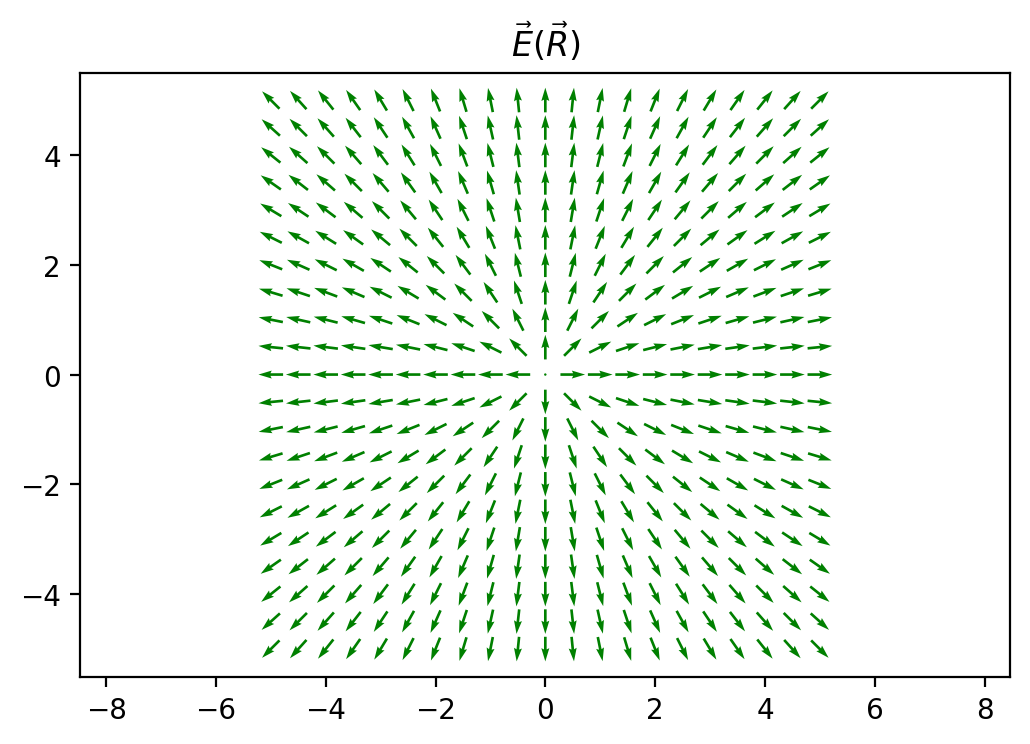

In [8]:
X,Y = coordinates_2d()
Ex,Ey = field_2d()
draw_field_2d(X,Y,Ex,Ey)

## Dipole

Change the values and locations of the charges below.

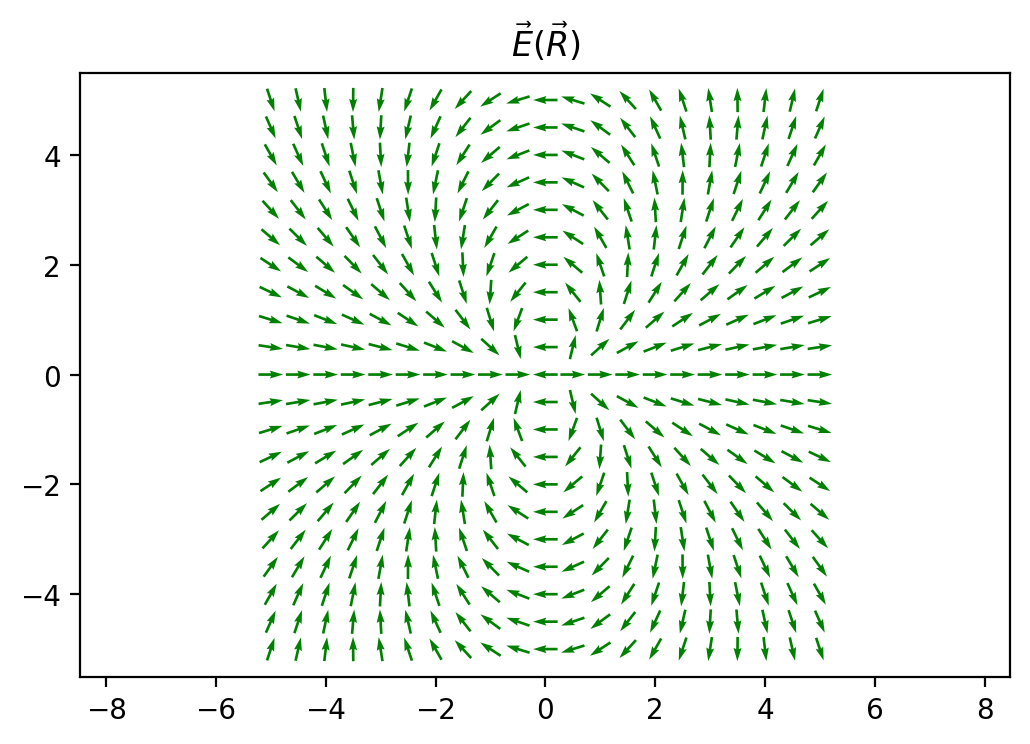

In [14]:
q1 = +2
x1 = +0.2
y1 = 0

q2 = -2
x2 = -0.2
y2 = 0

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2)))
draw_field_2d(X,Y,Ex,Ey)

What patterns or trends do you notice when the charges have the same sign?  What happens near the charges?  What happens farther away?

Much like in the previous like-charge example, the field near the charges is skewed to be 'greater' near the larger charge. However, at greater distances the field looks like it is from a single point.

What patterns or trends do you notice when the charges have the opposite sign and different magnitudes?  What happens near the charges?  What happens farther away?

Locally, the field from the smaller charge is completely directed into the larger one, but the effect of the larger charge ultimately dominates the field at greater distances.

What patterns or trends do you notice when the charges have the opposite sign and equal magnitudes?  What happens near the charges?  What happens farther away?

It seems that the field is directed parallel to the axes orthogonal to the dipole axis, and orthogonal to the dipole axis itself. This geometry is consistent regardless of distance, but the closer you are to the dipole axis (or exactly orthogonal) the less curved the field is.

## Quadrupole

The field created by two charges of equal magnitude and opposite sign that are very close together is called a ***dipole***.

We can combine two dipoles to make a new kind of patterns.  Try the following.

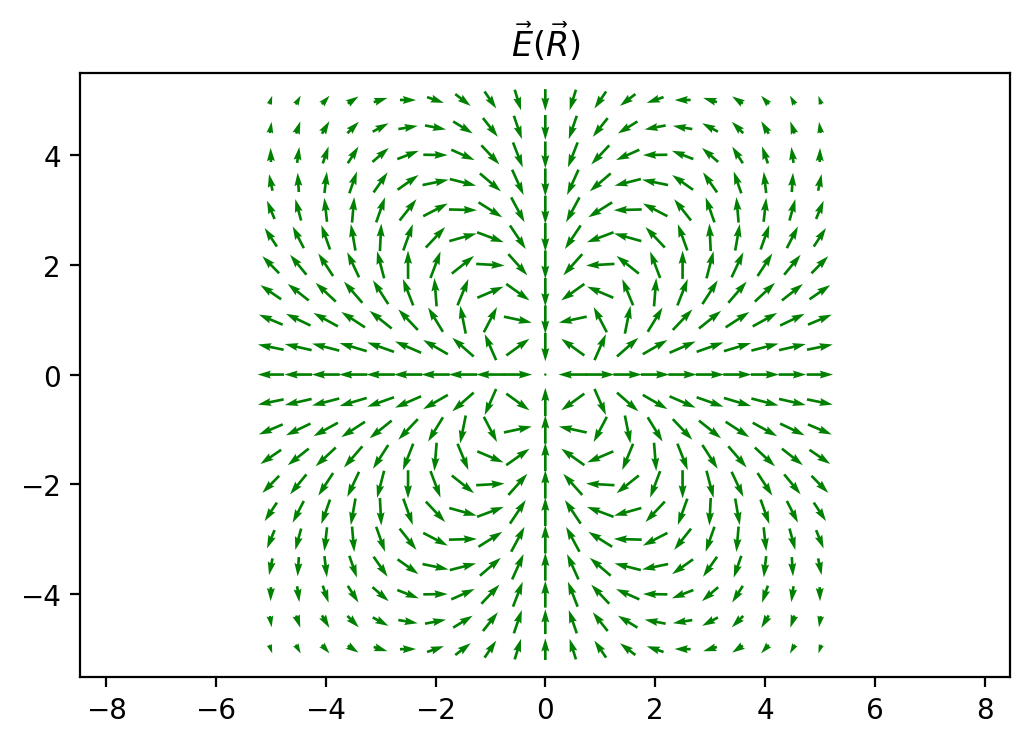

In [15]:
# (A) Two dipoles, pointing directly at each other.
q1 = +1
x1 = +0.5
y1 = 0

q2 = -2.0
x2 = 0
y2 = 0

q3 = +1
x3 = -0.5
y3 = 0

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) + np.stack(field_2d(q3, (x3,y3)))
draw_field_2d(X,Y,Ex,Ey)

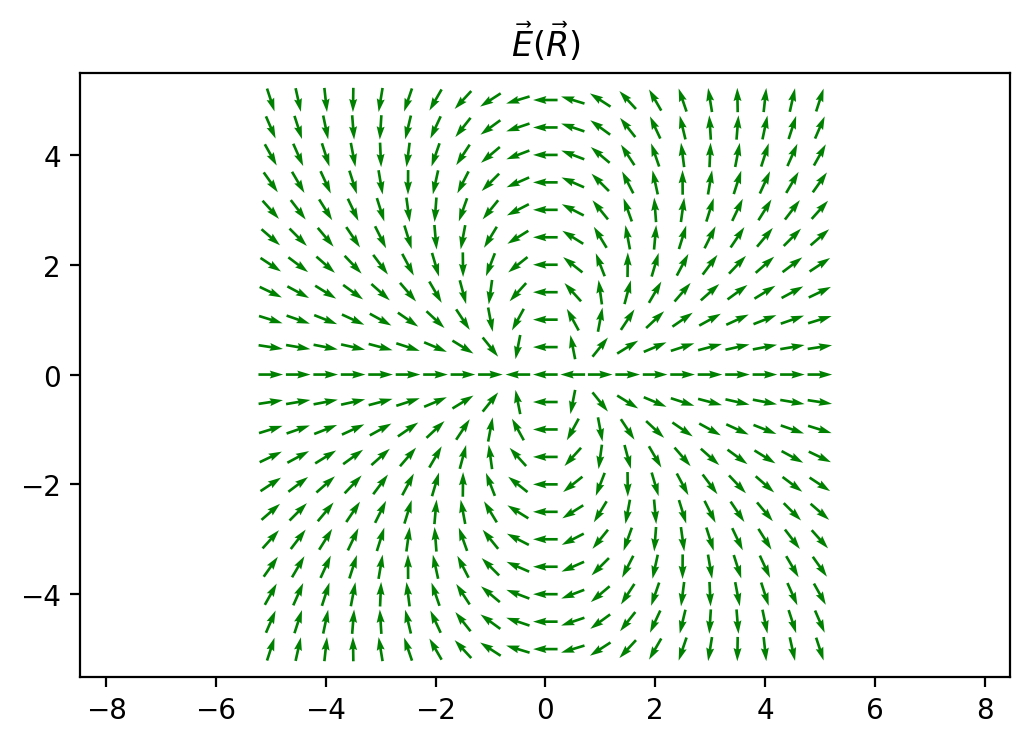

In [16]:
# (B) Two dipoles, end to end.
q1 = +1
x1 = +0.5
y1 = 0

q2 = 0
x2 = 0
y2 = 0

q3 = -1
x3 = -0.5
y3 = 0

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) + np.stack(field_2d(q3, (x3,y3)))
draw_field_2d(X,Y,Ex,Ey)

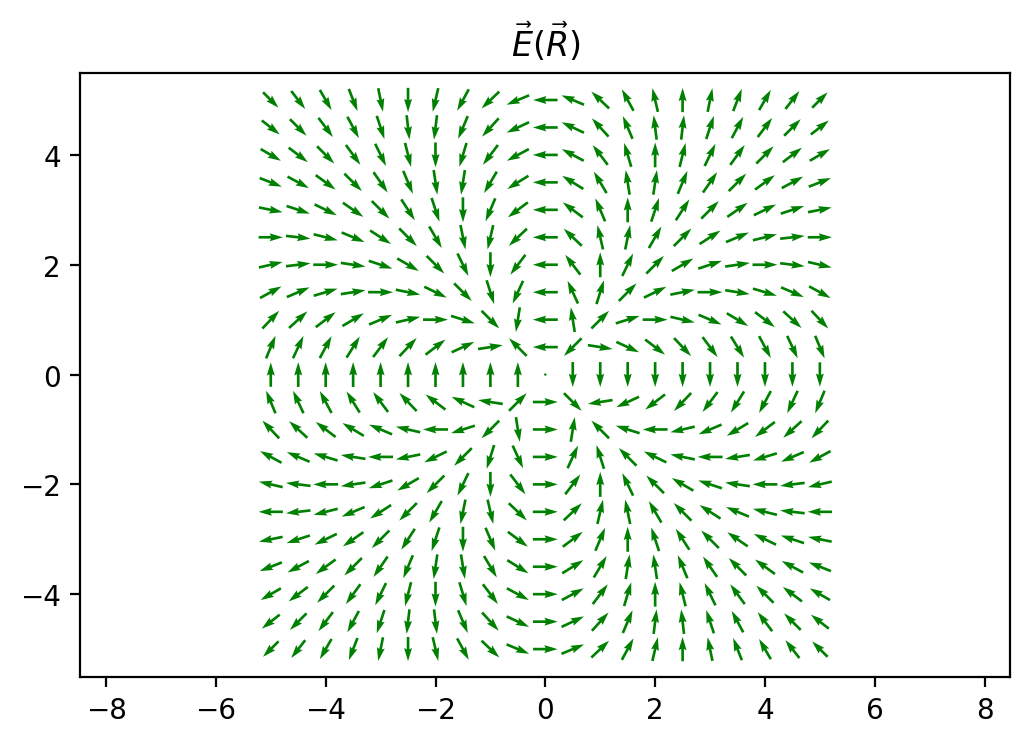

In [17]:
# (C) Two dipoles, pointing in opposite directions, but separated.
q1 = +1
x1 = +0.5
y1 = +0.5

q2 = -1
x2 = +0.5
y2 = -0.5

q3 = -1
x3 = -0.5
y3 = +0.5

q4 = +1
x4 = -0.5
y4 = -0.5

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) \
        + np.stack(field_2d(q3, (x3,y3))) + np.stack(field_2d(q4, (x4,y4)))
draw_field_2d(X,Y,Ex,Ey)

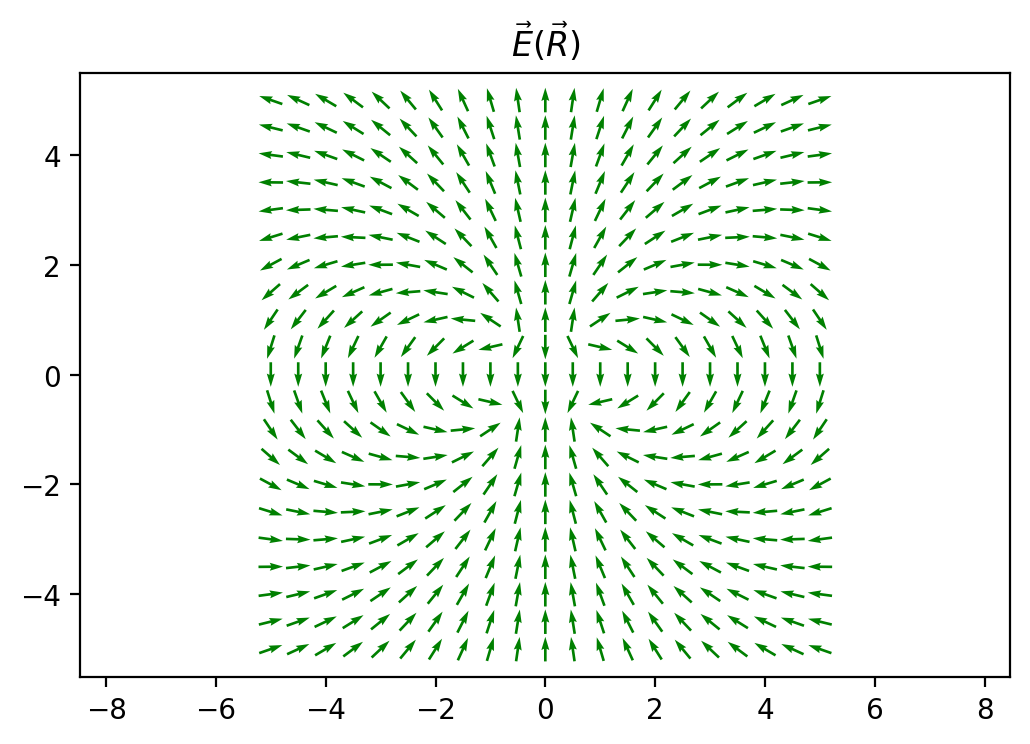

In [18]:
# (C) Two dipoles, pointing in the same direction, but separated.
q1 = +1
x1 = +0.5
y1 = +0.5

q2 = -1
x2 = +0.5
y2 = -0.5

q3 = +1
x3 = -0.5
y3 = +0.5

q4 = -1
x4 = -0.5
y4 = -0.5

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) \
        + np.stack(field_2d(q3, (x3,y3))) + np.stack(field_2d(q4, (x4,y4)))
draw_field_2d(X,Y,Ex,Ey)

Some of these fields are *dipole* fields and some are *quadrupole* fields.  Which are dipole fields?  Which are quadrupole?  How can you tell?  Where do you think the names come from?

I believe that (A) and (C) are quadrupole fields, while (B) and (D (mislabeled C again)) are dipole fields. This is because  of the number of distinct regions in the field where it changes direction; 4 for (quad)rupoles and 2 for (di)poles. These shapes are therefore probably known as poles (or lobes?), and correspond to the same quantity of straight lines in the field between them.

# Further Exploration

Try at least one of the following.

## Tripole

We saw monopole, dipole, and quadrupole fields.  Can you create a tripole field?

Copy one of the field plotting cells below and tinker with the charges and locations.

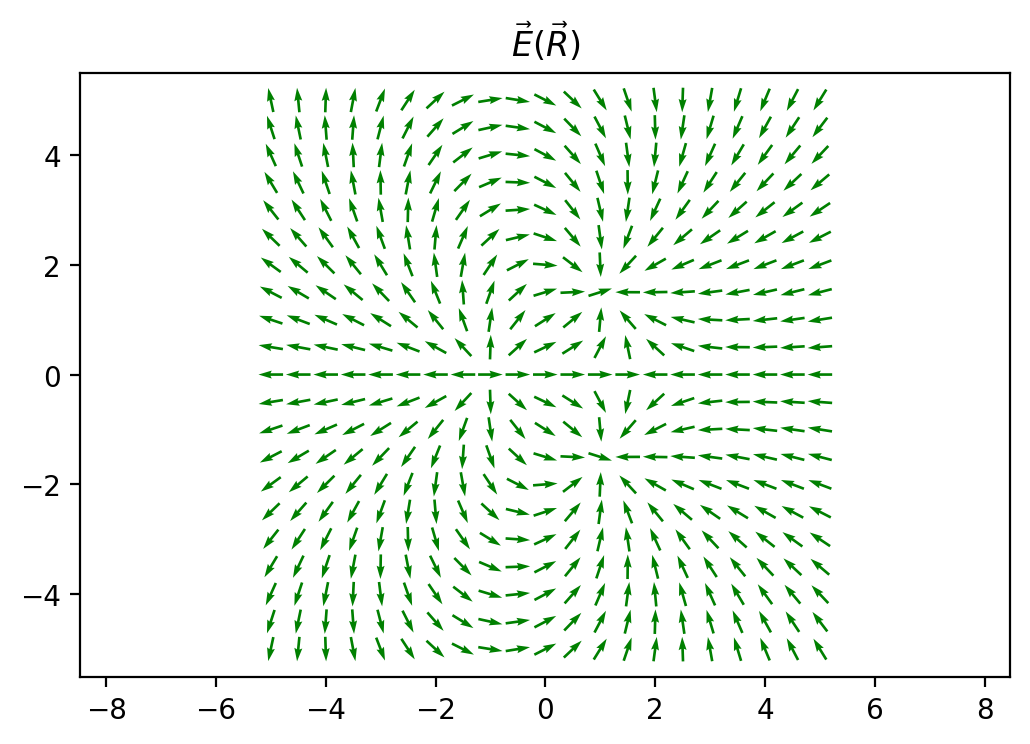

In [22]:
# Attempt to make a "tripole" field
q1 = +2
x1 = -1
y1 = +0

q2 = -1
x2 = +1
y2 = +1.5

q3 = -1
x3 = +1
y3 = -1.5


X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) \
        + np.stack(field_2d(q3, (x3,y3)))
draw_field_2d(X,Y,Ex,Ey)

What did you find?

No matter the orientation, the number of poles apears to be fixed at 2 or 4. I suspect that this is an inherent property of electric charges only having two 'directions' (+ or -). This makes sense to me, as I have never heard of, or observed, a tripolar field or effect before.

## Streamlines

Refer to the streamlines example from the `visualizing-fields` notebook.  Adapt the code there to produce similar plots for (A) a dipole field and (B) a quadrupole field.

Text(0.5, 1.0, 'Quadrupole field')

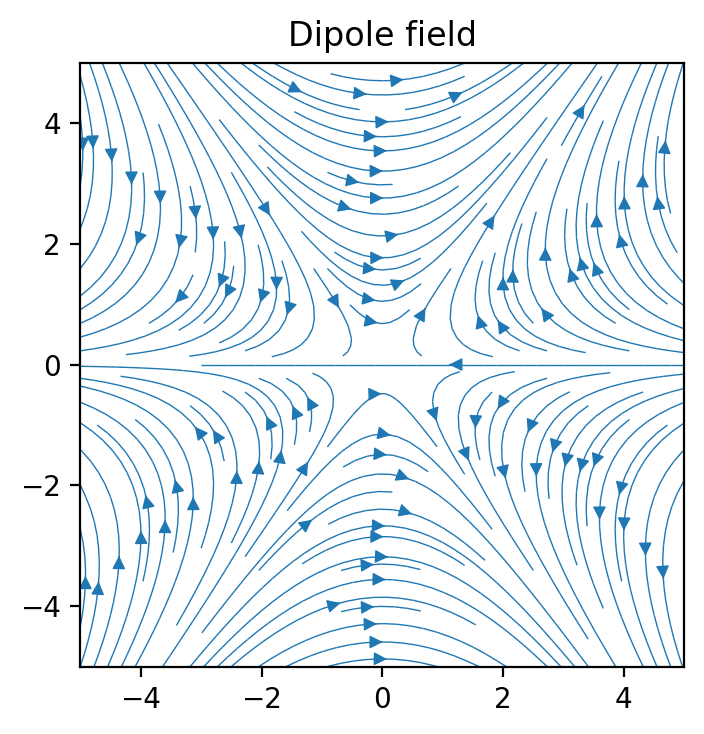

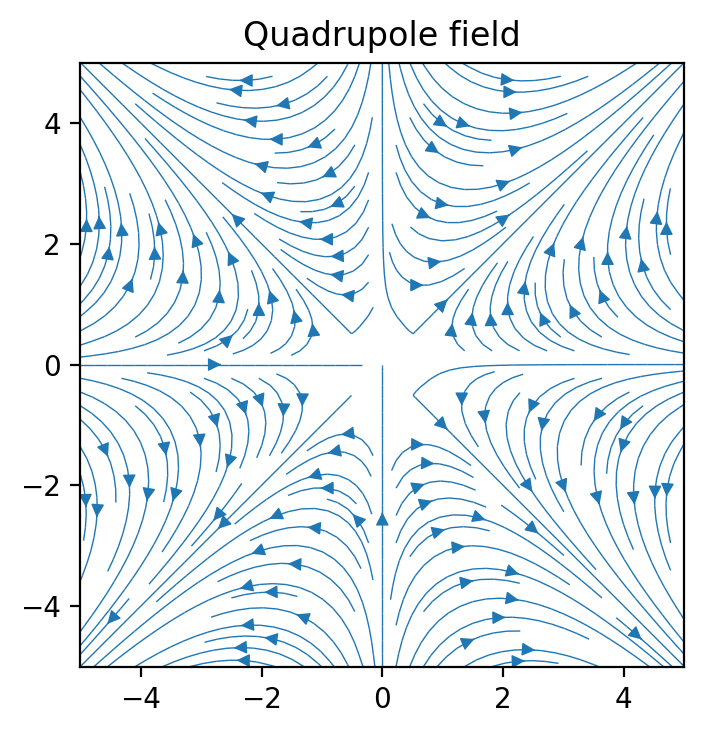

In [37]:
# For dipole field:
q1 = +2
x1 = +0.2
y1 = 0

q2 = -2
x2 = -0.2
y2 = 0

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2)))

fig = plt.figure(dpi=200)
ax = fig.add_subplot()

ax.streamplot(X[:,0],Y[0,:],Ex,Ey, linewidth=0.5, density=1.5)
ax.axis("scaled")
ax.set_title("Dipole field")

# For quadrupole field:
q1 = +1
x1 = +0.5
y1 = +0.5

q2 = -1
x2 = +0.5
y2 = -0.5

q3 = -1
x3 = -0.5
y3 = +0.5

q4 = +1
x4 = -0.5
y4 = -0.5

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) \
        + np.stack(field_2d(q3, (x3,y3))) + np.stack(field_2d(q4, (x4,y4)))

fig = plt.figure(dpi=200)
ax = fig.add_subplot()

ax.streamplot(X[:,0],Y[0,:],Ex,Ey, linewidth=0.5, density=1.5)
ax.axis("scaled")
ax.set_title("Quadrupole field")


Which representation seems most useful to you?  Why?

Disclaimer: I do NOT know if this is implemented correctly, as I had a lot of trouble debugging (The signs might still be flipped). However, assuming that this is the (relatively) correct visualization, I still think that the vector plots are easier to understand and convey the same information. Another issue with this view is the sensitivity to computational resolution; in the boundary between patterns, the streamlines change a lot depending on the number of points plotted.

## Coding Challenge: Slider

There is a thrid notebook in this folder: `slider-example.`  It illustrates how to add a slider to a plot — effectively an interactive animation.

Try to adapt this example to one of the plots you've created this week.  For example, you could ...

- Add a slider to a dipole plot that controls the separation of the charges.
- Add a slider to a heatmap of the potential that controls the z-coordinate of the slice.
- Implement your own idea for something cool!

<IPython.core.display.Javascript object>


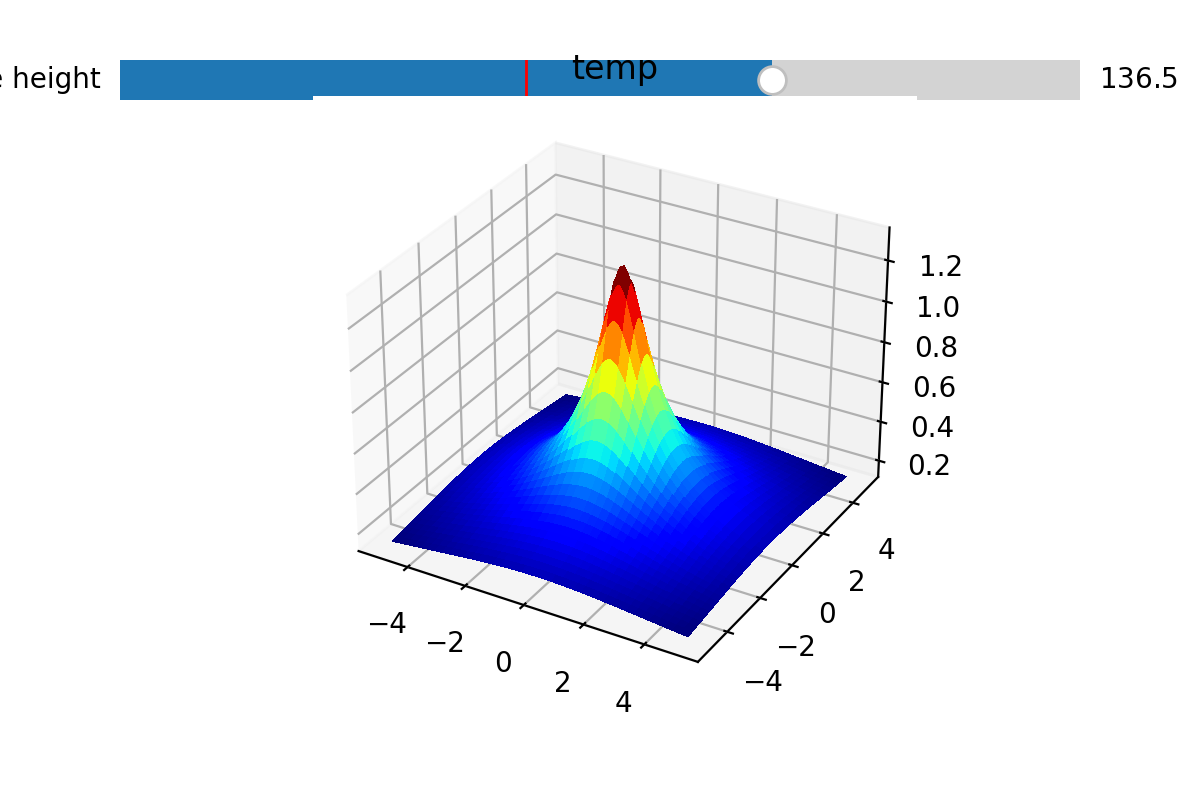

In [53]:
#NOTE: Nonworking code; cannot figure out without rewriting from scratch (No time left)

from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.widgets import Slider

%matplotlib notebook

#Functions & vars from 01-visualizing-fields
def coordinates(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    
    return X, Y, Z

def potential(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0, z0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + (Z-z0)**2 + epsilon**2)
    V = q/R
    
    return V

def field(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0, z0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + (Z-z0)**2 + epsilon**2)
    Ex = q*(X-x0)/R**3
    Ey = q*(Y-y0)/R**3
    Ez = q*(Z-z0)/R**3
    
    return Ex, Ey, Ez

X, Y, Z = coordinates()
V = potential()
Ex, Ey, Ez = field()


#Derived from 01-visualizing-fields: 2D Slices of Potential
x0 = 50
y0 = 50
z0 = 85
z_val = Z[x0,y0,z0]

# Get slice
x = X[:,:,z0]
y = Y[:,:,z0]
v = V[:,:,z0]

# Create a surface plot.
fig = plt.figure(dpi=200)
ax2 = fig.add_axes([0.1, 0.85, 0.8, 0.1])
ax1 = fig.add_subplot(projection='3d')

s = Slider(ax = ax2, label = 'Z slice height', valmin = 0, valmax = 201, valinit = 85)

def update(val):
    value = s.val
    
    # Get new slice
    x = X[:,:,value]
    y = Y[:,:,value]
    v = V[:,:,value]
    
    ax1.cla()
    ax1.plot_surface(x,y,v, cmap='jet', antialiased=False, linewidth=0)

s.on_changed(update)
update(0)

plt.show()